In [230]:
# References:
# https://plot.ly/ipython-notebooks/principal-component-analysis/
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# Class notes and lecture examples provide on blackboard

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import sklearn.decomposition as decomposition
from sklearn.preprocessing import StandardScaler
import plotly
import plotly.graph_objs as go
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [232]:
diabetesData=pd.read_csv('E:\Local Disk D\IIT-C\Sem 4\CS 584 Machine Learning\Homeworks\Homework 4\ChicagoDiabetes.csv')

diabetesDataFrame=pd.DataFrame(diabetesData)


In [233]:
diabetesDataFrame.head(5)

,ZIP code (or aggregate),Community,Hospitalizations 2000,Crude Rate 2000,Hospitalizations 2001,Crude Rate 2001,Hospitalizations 2002,Crude Rate 2002,Hospitalizations 2003,Crude Rate 2003,...,Hospitalizations 2007,Crude Rate 2007,Hospitalizations 2008,Crude Rate 2008,Hospitalizations 2009,Crude Rate 2009,Hospitalizations 2010,Crude Rate 2010,Hospitalizations 2011,Crude Rate 2011
0,"60601, 60602, 60603, 60604, 60605 & 60611",Downtown,57,12.7,60,12.7,71,14.4,61,11.8,...,52,8.6,43,6.9,54,8.4,49,7.3,40,6.0
1,"60606, 60607 & 60661",West Loop,41,19.0,30,13.1,32,13.3,28,11.1,...,35,11.6,49,15.6,31,9.5,26,7.7,31,9.1
2,60608,Lower West Side,211,22.8,193,21.1,166,18.3,172,19.2,...,179,20.9,182,21.5,192,22.9,192,23.2,207,25.0
3,60609,New City,242,30.5,176,22.6,204,26.7,222,29.6,...,219,31.6,185,27.3,206,31.0,203,31.3,176,27.1
4,60610 & 60654,Near North Side,80,16.8,79,16.5,84,17.3,80,16.3,...,60,11.8,71,13.8,64,12.3,74,14.1,78,14.8


In [234]:
crudeDataFrame=diabetesDataFrame[['Crude Rate 2000','Crude Rate 2001','Crude Rate 2002','Crude Rate 2003','Crude Rate 2004',
                            'Crude Rate 2005','Crude Rate 2006','Crude Rate 2007','Crude Rate 2008','Crude Rate 2009',
                             'Crude Rate 2010','Crude Rate 2011']]

In [235]:
crudeDataFrame.head()

,Crude Rate 2000,Crude Rate 2001,Crude Rate 2002,Crude Rate 2003,Crude Rate 2004,Crude Rate 2005,Crude Rate 2006,Crude Rate 2007,Crude Rate 2008,Crude Rate 2009,Crude Rate 2010,Crude Rate 2011
0,12.7,12.7,14.4,11.8,10.2,11.5,11.9,8.6,6.9,8.4,7.3,6.0
1,19.0,13.1,13.3,11.1,8.7,11.2,11.0,11.6,15.6,9.5,7.7,9.1
2,22.8,21.1,18.3,19.2,21.7,23.2,20.0,20.9,21.5,22.9,23.2,25.0
3,30.5,22.6,26.7,29.6,26.2,29.1,26.0,31.6,27.3,31.0,31.3,27.1
4,16.8,16.5,17.3,16.3,16.6,18.0,14.2,11.8,13.8,12.3,14.1,14.8


In [236]:
crudeDataFrame.describe()

,Crude Rate 2000,Crude Rate 2001,Crude Rate 2002,Crude Rate 2003,Crude Rate 2004,Crude Rate 2005,Crude Rate 2006,Crude Rate 2007,Crude Rate 2008,Crude Rate 2009,Crude Rate 2010,Crude Rate 2011
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,26.228261,26.245652,27.117391,25.436957,26.339130,27.010870,27.519565,29.106522,28.006522,27.904348,27.010870,26.073913
std,12.840036,13.561427,14.296811,13.371435,15.781881,14.836685,16.222243,17.109015,16.101972,15.681411,15.440052,15.332615
min,9.800000,6.200000,8.700000,6.500000,7.800000,5.700000,8.600000,8.300000,6.900000,7.000000,7.300000,6.000000
25%,15.900000,16.500000,14.900000,15.325000,13.750000,15.025000,14.725000,15.675000,15.625000,16.050000,14.525000,13.725000
50%,22.650000,21.850000,23.050000,21.150000,21.650000,22.200000,23.700000,23.600000,22.750000,23.000000,21.900000,21.350000
75%,32.525000,35.875000,38.350000,35.200000,34.275000,36.450000,41.125000,43.850000,39.875000,43.050000,40.125000,42.675000
max,61.500000,58.800000,59.400000,56.800000,59.000000,60.400000,60.900000,69.300000,63.000000,65.000000,56.900000,55.800000


In [237]:
crudeDataFrame_std = StandardScaler().fit_transform(crudeDataFrame)

print(crudeDataFrame_std)

[[-1.06524228e+00 -1.00987396e+00 -8.99355760e-01 -1.03112686e+00
  -1.03393688e+00 -1.05699258e+00 -9.73488219e-01 -1.21182428e+00
  -1.32528796e+00 -1.25753175e+00 -1.29071298e+00 -1.32369664e+00]
 [-5.69167699e-01 -9.80052614e-01 -9.77146190e-01 -1.08405574e+00
  -1.13003284e+00 -1.07743616e+00 -1.02958065e+00 -1.03454054e+00
  -7.79011062e-01 -1.18660987e+00 -1.26452006e+00 -1.11927912e+00]
 [-2.69948109e-01 -3.83625688e-01 -6.23553327e-01 -4.71593013e-01
  -2.97201145e-01 -2.59692780e-01 -4.68656333e-01 -4.84960952e-01
  -4.08547417e-01 -3.22652483e-01 -2.49544486e-01 -7.08150467e-02]
 [ 3.36365272e-01 -2.71795640e-01 -2.95173172e-02  3.14778885e-01
  -8.91324895e-03  1.42364382e-01 -9.47067871e-02  1.47351049e-01
  -4.43628167e-02  1.99590415e-01  2.80862106e-01  6.76613402e-02]
 [-7.42400094e-01 -7.26571171e-01 -6.94271899e-01 -6.90869792e-01
  -6.23927427e-01 -6.14048246e-01 -8.30140893e-01 -1.02272163e+00
  -8.92033869e-01 -1.00608146e+00 -8.45433374e-01 -7.43414640e-01]
 [ 5.

In [238]:
print('NumPy covariance matrix: \n%s' %np.cov(crudeDataFrame_std.T))

NumPy covariance matrix: 
[[1.02222222 0.97079369 0.96630772 0.93595102 0.96428001 0.94463443
  0.93405319 0.91482114 0.88292921 0.90067802 0.85893534 0.86967533]
 [0.97079369 1.02222222 0.98781176 0.9626991  0.98973358 0.97017225
  0.96041035 0.93670135 0.93362493 0.9354989  0.90037972 0.91983535]
 [0.96630772 0.98781176 1.02222222 0.98080752 0.98284332 0.97363503
  0.98257396 0.96002155 0.96490453 0.96192272 0.92483244 0.94307872]
 [0.93595102 0.9626991  0.98080752 1.02222222 0.97757578 0.9854944
  0.98690601 0.9676926  0.97536058 0.97719694 0.9409305  0.93761519]
 [0.96428001 0.98973358 0.98284332 0.97757578 1.02222222 0.9898198
  0.97856221 0.97171317 0.95246888 0.96371477 0.92132482 0.93238121]
 [0.94463443 0.97017225 0.97363503 0.9854944  0.9898198  1.02222222
  0.98773316 0.99899966 0.96240756 0.97731359 0.94266234 0.94939833]
 [0.93405319 0.96041035 0.98257396 0.98690601 0.97856221 0.98773316
  1.02222222 0.99646427 0.98804071 0.98709114 0.95485173 0.96599229]
 [0.91482114 0.93

In [239]:
# Calculate the Correlations among the variables

crudeDataCorrelation = crudeDataFrame.corr(method = 'pearson', min_periods = 1)

# print(crudeDataCorrelation)

In [240]:
crudeDataCorrelation.head()

,Crude Rate 2000,Crude Rate 2001,Crude Rate 2002,Crude Rate 2003,Crude Rate 2004,Crude Rate 2005,Crude Rate 2006,Crude Rate 2007,Crude Rate 2008,Crude Rate 2009,Crude Rate 2010,Crude Rate 2011
Crude Rate 2000,1.000000,0.949689,0.945301,0.915604,0.943317,0.924099,0.913748,0.894934,0.863735,0.881098,0.840263,0.850769
Crude Rate 2001,0.949689,1.000000,0.966338,0.941771,0.968218,0.949082,0.939532,0.916338,0.913329,0.915162,0.880806,0.899839
Crude Rate 2002,0.945301,0.966338,1.000000,0.959486,0.961477,0.952469,0.961214,0.939152,0.943928,0.941011,0.904727,0.922577
Crude Rate 2003,0.915604,0.941771,0.959486,1.000000,0.956324,0.964071,0.965452,0.946656,0.954157,0.955954,0.920475,0.917232
Crude Rate 2004,0.943317,0.968218,0.961477,0.956324,1.000000,0.968302,0.957289,0.950589,0.931763,0.942764,0.901296,0.912112


In [241]:
# Eigenvalue decomposition
evals, evecs = np.linalg.eigh(crudeDataCorrelation)

print("Eigenvalues of crudeDataCorrelation = \n", evals,"\n")
print("Eigenvectors of crudeDataCorrelation = \n",evecs)

Eigenvalues of crudeDataCorrelation = 
 [8.63888250e-03 1.87137818e-02 2.20008932e-02 2.26279799e-02
 2.48666393e-02 3.63460717e-02 4.85811694e-02 5.16164779e-02
 7.13379374e-02 9.52033227e-02 2.90151994e-01 1.13099149e+01] 

Eigenvectors of crudeDataCorrelation = 
 [[ 0.03284521  0.16625704  0.04838581 -0.22924696  0.0350287   0.20213049
   0.36595573 -0.47973326  0.23105943  0.26972499  0.55353471  0.27873353]
 [-0.25009037  0.03688071 -0.51814174 -0.22029108  0.02155195 -0.0327294
  -0.30079887  0.4629466  -0.16210235  0.27795134  0.35625981  0.28688885]
 [ 0.03517356 -0.13720419  0.1041788   0.68567012  0.25167858 -0.2673451
   0.29820365  0.09017121 -0.34592661  0.14661716  0.20313985  0.29093249]
 [-0.25445156  0.01776436  0.27515552 -0.24469983 -0.01520023 -0.45508484
  -0.37558966 -0.42304029 -0.35523755 -0.241586    0.05267923  0.29095312]
 [ 0.10046907  0.03729803  0.49345389  0.23495438 -0.4604805   0.36391462
  -0.3556207   0.25211533  0.10294076 -0.07433518  0.23367299  0.

In [242]:
# Make a list of (eigenvalue, eigenvector) tuples
sortedEig_Values=[]
eig_pairs = [(np.abs(evals[i]), evecs[:,i]) for i in range(len(evals))]

# print(eig_pairs)

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
    sortedEig_Values.append(i[0])

Eigenvalues in descending order:
11.309914850028237
0.2901519941801683
0.09520332266867998
0.07133793743551502
0.05161647794239043
0.04858116941880226
0.03634607169903191
0.02486663930332436
0.02262797991360807
0.022000893151986566
0.018713781761292864
0.008638882496961453


In [243]:
eig_pairs
# sortedEig_Values

[(11.309914850028237,
  array([0.27873353, 0.28688885, 0.29093249, 0.29095312, 0.29083427,
         0.29229942, 0.29331524, 0.29054488, 0.28960798, 0.29084959,
         0.28321691, 0.28557873])),
 (0.2901519941801683,
  array([ 0.55353471,  0.35625981,  0.20313985,  0.05267923,  0.23367299,
          0.06706659, -0.04878151, -0.10811483, -0.26826371, -0.2273811 ,
         -0.43087693, -0.37436   ])),
 (0.09520332266867998,
  array([ 0.26972499,  0.27795134,  0.14661716, -0.241586  , -0.07433518,
         -0.29076405, -0.21471144, -0.4293359 , -0.15925508, -0.14514096,
          0.44217317,  0.45572594])),
 (0.07133793743551502,
  array([ 0.23105943, -0.16210235, -0.34592661, -0.35523755,  0.10294076,
          0.38253838, -0.01529361,  0.4564904 , -0.4560729 , -0.18331064,
          0.21994641,  0.13763698])),
 (0.05161647794239043,
  array([-0.47973326,  0.4629466 ,  0.09017121, -0.42304029,  0.25211533,
          0.06513389,  0.01661268,  0.14953456,  0.11669177, -0.2104919 ,
       

In [244]:
help(plotly.offline.iplot)
plotly.offline.init_notebook_mode(connected=True)

Help on function iplot in module plotly.offline.offline:

iplot(figure_or_data, show_link=False, link_text='Export to plot.ly', validate=True, image=None, filename='plot_image', image_width=800, image_height=600, config=None, auto_play=True)
    Draw plotly graphs inside an IPython or Jupyter notebook without
    connecting to an external server.
    To save the chart to Plotly Cloud or Plotly Enterprise, use
    `plotly.plotly.iplot`.
    To embed an image of the chart, use `plotly.image.ishow`.
    
    figure_or_data -- a plotly.graph_objs.Figure or plotly.graph_objs.Data or
                      dict or list that describes a Plotly graph.
                      See https://plot.ly/python/ for examples of
                      graph descriptions.
    
    Keyword arguments:
    show_link (default=False) -- display a link in the bottom-right corner of
                                of the chart that will export the chart to
                                Plotly Cloud or Plotly Enter

In [245]:
# What is the maximum number of principal components that you can get?
print("1(c)")

print("1(d)")

tot = sum(evals)
var_exp = [(i / tot)*100 for i in sorted(evals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,13)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,13)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig)
# py.iplot(fig, filename='selecting-principal-components')

1(c)
1(d)


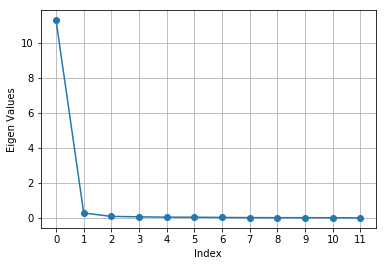

In [246]:
# Plot the Explained Variances against their indices.  Add a horizontal reference line whose value is the reciprocal of the number of variables. 
# Label the axes and add grid lines to the axes.
plt.plot(sortedEig_Values, marker = 'o')
plt.xlabel('Index')
plt.ylabel('Eigen Values')
plt.xticks(np.arange(0,12))
# plt.axhline((1/nVar), color = 'r', linestyle = '--')
plt.grid(True)
plt.show()

In [247]:
# What is the maximum number of principal components that you can get?
print("1(a)")

noOfVariables=crudeDataFrame.shape[1]

print("Number of principal components :",noOfVariables)

1(a)
Number of principal components : 12


In [248]:
# Extract the Principal Components
# Cumulative variance
# Explained Variance
myPCA = decomposition.PCA(n_components = noOfVariables, svd_solver = 'full')
# myPCA = decomposition.PCA(svd_solver = 'full')
myPCA.fit(crudeDataFrame)
# myPCA.fit(crudeDataCorrelation)

print("Mean: \n", myPCA.mean_,'\n')
print('Explained Variance: \n', myPCA.explained_variance_,'\n')
print('Explained Variance Ratio: \n', myPCA.explained_variance_ratio_,'\n')
print('Cumulative Explained Variance Ratio: \n', np.cumsum(myPCA.explained_variance_ratio_),'\n')
print('Principal Components: \n', myPCA.components_,'\n')
# print('Transposed Principal Components \n',np.transpose( myPCA.components_))

Mean: 
 [26.22826087 26.24565217 27.1173913  25.43695652 26.33913043 27.01086957
 27.51956522 29.10652174 28.00652174 27.90434783 27.01086957 26.07391304] 

Explained Variance: 
 [2.58467620e+03 6.04885809e+01 2.24497345e+01 1.67994959e+01
 1.11800183e+01 9.98879423e+00 7.82174828e+00 6.01555291e+00
 4.97444927e+00 4.73739583e+00 4.52004400e+00 2.05988754e+00] 

Explained Variance Ratio: 
 [9.44791079e-01 2.21107277e-02 8.20617642e-03 6.14081323e-03
 4.08669432e-03 3.65125956e-03 2.85912719e-03 2.19889854e-03
 1.81833813e-03 1.73168667e-03 1.65223684e-03 7.52962159e-04] 

Cumulative Explained Variance Ratio: 
 [0.94479108 0.96690181 0.97510798 0.9812488  0.98533549 0.98898675
 0.99184588 0.99404478 0.99586311 0.9975948  0.99924704 1.        ] 

Principal Components: 
 [[ 2.35320979e-01  2.56316614e-01  2.74461731e-01  2.57019398e-01
   3.03095592e-01  2.86810861e-01  3.15055784e-01  3.29604268e-01
   3.09242978e-01  3.02304096e-01  2.90086177e-01  2.90417136e-01]
 [ 4.96811977e-01  3.5

1(b)


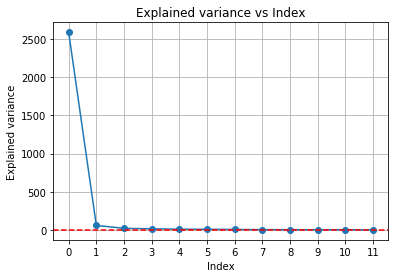

In [249]:
# Plot the Explained Variances against their indices.  Add a horizontal reference line whose value is the reciprocal of the number of variables. 
# Label the axes and add grid lines to the axes.
print("1(b)")

plt.plot(myPCA.explained_variance_, marker = 'o')
plt.xlabel('Index')
plt.ylabel('Explained variance')
plt.title("Explained variance vs Index")
plt.xticks(np.arange(0,12))
plt.axhline((1/noOfVariables), color = 'red', linestyle = '--')
plt.grid(True)
plt.show()


In [250]:
# PCADataFrame=pd.DataFrame(myPCA.components_,columns=[['PC1','PC2','PC3','PC4','PC5','PC6','PC7',
#                                                       'PC8','PC9','PC10''PC11''PC12']])

In [251]:
PCADataFrame=pd.DataFrame(myPCA.components_)

In [252]:
PCADataFrame

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.235321,0.256317,0.274462,0.257019,0.303096,0.286811,0.315056,0.329604,0.309243,0.302304,0.290086,0.290417
1,0.496812,0.358227,0.226961,0.083681,0.300861,0.111581,-0.014814,-0.078695,-0.263604,-0.212352,-0.445498,-0.379354
2,0.244363,0.310796,0.201815,-0.092851,-0.015648,-0.271116,-0.222235,-0.558038,-0.122294,-0.104489,0.415358,0.401748
3,0.172702,-0.064679,-0.276679,-0.298131,0.099744,0.327070,-0.078018,0.405954,-0.549614,-0.275186,0.301633,0.209673
4,0.000589,-0.090957,-0.293232,0.416344,0.211172,0.206583,-0.287240,-0.255067,-0.182617,0.369662,0.392136,-0.416884
5,0.556684,-0.407744,0.158551,0.176754,-0.526867,-0.149496,0.284950,0.058424,-0.095654,0.005569,0.202174,-0.181285
6,-0.393221,0.171870,0.160250,0.568980,-0.211407,0.188436,0.148141,-0.018014,-0.130243,-0.571499,0.142712,-0.002760
7,0.073592,0.046054,0.239457,0.047577,-0.473430,0.481740,-0.597987,0.069742,0.063674,0.185604,-0.214418,0.172396
8,0.065933,0.154715,-0.456581,0.170066,-0.205589,0.183118,0.411290,-0.309116,-0.256024,0.265354,-0.346145,0.371535
9,0.163227,-0.562787,-0.015820,0.398781,0.383180,-0.100294,-0.229787,-0.038397,0.046640,-0.197696,-0.251767,0.426079


In [253]:
# PCADataFrame[[0,1]].as_matrix()

In [254]:
# inputVars=PCADataFrame[[0,1]].as_matrix()

# print(inputVars)

In [255]:
_thisPCA= decomposition.PCA(n_components = 2)

X_transformed = pd.DataFrame(_thisPCA.fit_transform(crudeDataFrame))


print(_thisPCA)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [256]:
X_transformed

,0,1
0,-58.642262,5.759697
1,-53.335183,4.136012
2,-18.664093,-2.250421
3,4.185894,-1.683720
4,-41.326453,3.542784
5,42.427584,-12.780744
6,-50.809308,0.893412
7,-57.754342,-2.424049
8,-9.573350,-1.381434
9,-9.049177,8.689374


In [257]:
inputVars=X_transformed.as_matrix()

# print(inputVars)

In [258]:
nClusters = np.zeros(10)
Elbow = np.zeros(10)
Silhouette = np.zeros(10)

In [259]:
# Clustering 

for c in range(10):
    KClusters = c+1
    nClusters[c] = KClusters

#     print(c)
#     print(KClusters)
    kmeans = cluster.KMeans(n_clusters=KClusters, random_state=20190405).fit(inputVars)
  
    if (1 < KClusters):
        Silhouette[c] = metrics.silhouette_score(inputVars, kmeans.labels_)
    else:
        Silhouette[c] = np.NaN

    WCSS = np.zeros(KClusters)
    nC = np.zeros(KClusters)

    for i in range(len(inputVars)):
        k = kmeans.labels_[i]
        nC[k] += 1
        diff = inputVars[i] - kmeans.cluster_centers_[k]
        WCSS[k] += diff.dot(diff)

    Elbow[c] = 0
    for k in range(KClusters):
        Elbow[c] += WCSS[k] / nC[k]
    print("Cluster Assignment: \n", kmeans.labels_)
    
    for k in range(KClusters):
        print("Cluster ", k)
        print("Centroid = ", kmeans.cluster_centers_[k])
        print("Size = ", nC[k])
        print("Within Sum of Squares = ", WCSS[k])
        print(" ")

Cluster Assignment: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Cluster  0
Centroid =  [ 1.00402778e-15 -1.27434295e-15]
Size =  46.0
Within Sum of Squares =  119032.41521867679
 
Cluster Assignment: 
 [0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 1 0 1 0 0 0 0 0]
Cluster  0
Centroid =  [-30.40843564   0.71389462]
Size =  32.0
Within Sum of Squares =  13366.289259103825
 
Cluster  1
Centroid =  [69.50499574 -1.63175912]
Size =  14.0
Within Sum of Squares =  8389.783666536357
 
Cluster Assignment: 
 [2 2 0 0 2 1 2 2 0 0 1 2 1 1 1 0 0 1 2 0 1 0 2 2 2 2 1 0 2 0 0 2 1 1 2 2 0
 1 1 0 1 2 2 2 2 0]
Cluster  0
Centroid =  [-6.39355774  0.79891305]
Size =  14.0
Within Sum of Squares =  3076.984368882337
 
Cluster  1
Centroid =  [72.61930576 -1.21052545]
Size =  13.0
Within Sum of Squares =  6592.285283989499
 
Cluster  2
Centroid =  [-44.97585087   0.23958148]
Size =  19.0
Within Sum of Squares =  1771.74087038

In [260]:
# Plot the Elbow and the Silhouette charts against the number of clusters.
print("N Clusters\t Elbow Value\tSilhouette Value:")
for i in range(10):
    print('{:.0f} \t\t {:.3f} \t\t {:.3f}'
          .format(nClusters[i], Elbow[i], Silhouette[i]))

N Clusters	 Elbow Value	Silhouette Value:
1 		 2587.661 		 nan
2 		 1016.967 		 0.715
3 		 820.133 		 0.604
4 		 521.963 		 0.616
5 		 517.203 		 0.540
6 		 476.381 		 0.489
7 		 446.646 		 0.482
8 		 391.478 		 0.458
9 		 347.130 		 0.472
10 		 308.775 		 0.467


1(e)


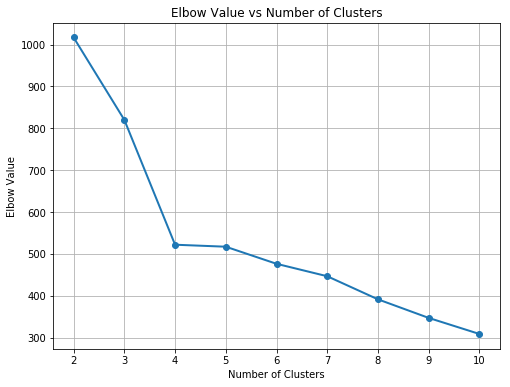

In [261]:
# Plot the Elbow and the Silhouette charts against the number of clusters.
print("1(e)")
plt.figure(figsize=(8, 6))
plt.plot(nClusters[np.where(nClusters >= 2)], Elbow[np.where(nClusters >= 2)], linewidth = 2, marker = 'o')
plt.grid(True)
plt.title("Elbow Value vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Elbow Value")
plt.xticks(np.arange(2,11, step = 1))
plt.show()

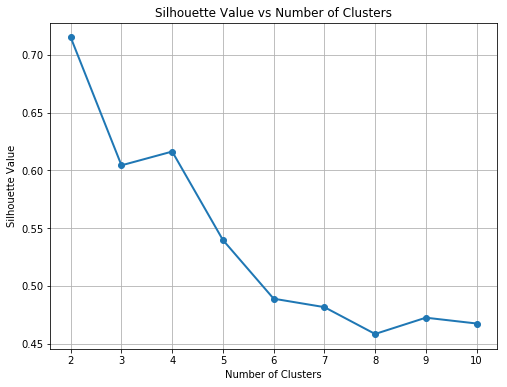

In [262]:
#Plot the Elbow and the Silhouette charts against the number of clusters.
plt.figure(figsize=(8, 6))
plt.plot(nClusters[np.where(nClusters >= 2)], Silhouette[np.where(nClusters >= 2)], linewidth = 2, marker = 'o')
plt.grid(True)
plt.title("Silhouette Value vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Value")
plt.xticks(np.arange(2, 11, step = 1))
plt.show()  

In [263]:
print("1(f)")

print("Based on the above charts the number of clusters are 4")

1(f)
Based on the above charts the number of clusters are 4


In [264]:
# List the names of the communities in each cluster.
print("1(g)")

inputData=X_transformed.as_matrix()

kmeanModel = cluster.KMeans(n_clusters=4, random_state=20190405 ).fit(inputData)

X_transformed['Cluster ID'] = kmeanModel.labels_


print(X_transformed['Cluster ID'])




1(g)
0     0
1     0
2     3
3     3
4     0
5     2
6     0
7     0
8     3
9     3
10    2
11    0
12    1
13    1
14    1
15    3
16    3
17    1
18    0
19    3
20    1
21    3
22    0
23    0
24    0
25    0
26    1
27    2
28    3
29    3
30    3
31    0
32    2
33    1
34    0
35    0
36    3
37    1
38    2
39    3
40    1
41    0
42    0
43    0
44    0
45    3
Name: Cluster ID, dtype: int32


In [265]:
# List the names of the communities in each cluster.
clusterCommunity=np.column_stack((X_transformed['Cluster ID'],diabetesData['Community']))

clusterCommunityCrude=np.column_stack((clusterCommunity,crudeDataFrame))

clusterCommunityCrudeDF=pd.DataFrame(clusterCommunityCrude,columns=['Cluster ID','Community','Crude Rate 2000','Crude Rate 2001'
                                             ,'Crude Rate 2002','Crude Rate 2003','Crude Rate 2004','Crude Rate 2005'
                                             ,'Crude Rate 2006','Crude Rate 2007','Crude Rate 2008','Crude Rate 2009'
                                             ,'Crude Rate 2010','Crude Rate 2011'])

In [266]:
# List the names of the communities in each cluster.
clusterCommunityCrudeDF.head(10)

,Cluster ID,Community,Crude Rate 2000,Crude Rate 2001,Crude Rate 2002,Crude Rate 2003,Crude Rate 2004,Crude Rate 2005,Crude Rate 2006,Crude Rate 2007,Crude Rate 2008,Crude Rate 2009,Crude Rate 2010,Crude Rate 2011
0,0,Downtown,12.7,12.7,14.4,11.8,10.2,11.5,11.9,8.6,6.9,8.4,7.3,6
1,0,West Loop,19,13.1,13.3,11.1,8.7,11.2,11,11.6,15.6,9.5,7.7,9.1
2,3,Lower West Side,22.8,21.1,18.3,19.2,21.7,23.2,20,20.9,21.5,22.9,23.2,25
3,3,New City,30.5,22.6,26.7,29.6,26.2,29.1,26,31.6,27.3,31,31.3,27.1
4,0,Near North Side,16.8,16.5,17.3,16.3,16.6,18,14.2,11.8,13.8,12.3,14.1,14.8
5,2,Near West Side,32.6,36.2,34,31.1,31,40.3,39.1,44.5,46.3,43.3,40.3,49.9
6,0,Lake View,13.3,14.9,10.8,13.4,13.1,12.3,11,12.3,10.3,15.1,11.2,11
7,0,Lincoln Park,9.8,12.4,9.4,9.1,9.1,10.5,11.2,9.5,10.7,11.3,11.4,9.5
8,3,Hyde Park,25.3,20.4,22.9,26.3,23.3,24.5,24.1,24.3,22.7,28.5,26.4,22.7
9,3,Chinatown,28.3,22.9,26,25.3,21.6,32.5,24.6,32.3,22.8,22.6,18,16.5


In [267]:
# List the names of the communities in each cluster.
clusterCommunityCrudeDF.sort_values('Cluster ID')

,Cluster ID,Community,Crude Rate 2000,Crude Rate 2001,Crude Rate 2002,Crude Rate 2003,Crude Rate 2004,Crude Rate 2005,Crude Rate 2006,Crude Rate 2007,Crude Rate 2008,Crude Rate 2009,Crude Rate 2010,Crude Rate 2011
0,0,Downtown,12.7,12.7,14.4,11.8,10.2,11.5,11.9,8.6,6.9,8.4,7.3,6
43,0,Belmont Harbor,11.4,6.2,8.7,6.5,7.8,5.7,8.6,8.3,7,7,7.6,6.8
42,0,Norwood Park,20.6,12.1,14.7,11.4,14.6,15,10.6,16.8,13.1,20,15.6,13
41,0,Mount Greenwood,12.4,16.5,13.1,10.7,10.4,16,16,18.8,16.1,14,10.2,11.9
35,0,Edgebrook,15.6,13,15.5,16.3,11.8,14.4,14.8,23.2,17.7,13.6,15.5,13.3
34,0,West Ridge,18.6,17.4,12.8,21.1,17,19.7,16.5,17.1,16.2,19,16.3,12.2
31,0,Portage Park,16.9,17.4,12.9,13.7,14.8,14.4,17.2,18,19.3,17.3,14.2,17
25,0,Dunning,13.4,18.1,15.9,18.1,13.3,15.1,12,12.7,14.7,11.3,15.5,13.5
24,0,Archer Heights,13.9,16.6,15.5,15,13.6,13.8,18.7,17.9,22.7,21.8,16.5,13.8
23,0,Edison Park,19.8,12.8,14.2,16.7,12.2,17.1,11.8,15.3,11.2,11.5,11.2,11.2


In [268]:
# 
data2000=clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2000'].sum()/clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2000'].count()
data2001=clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2001'].sum()/clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2001'].count()
data2002=clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2002'].sum()/clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2002'].count()
data2003=clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2003'].sum()/clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2003'].count()
data2004=clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2004'].sum()/clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2004'].count()
data2005=clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2005'].sum()/clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2005'].count()
data2006=clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2006'].sum()/clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2006'].count()
data2007=clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2007'].sum()/clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2007'].count()
data2008=clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2008'].sum()/clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2008'].count()
data2009=clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2009'].sum()/clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2009'].count()
data2010=clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2010'].sum()/clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2010'].count()
data2011=clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2011'].sum()/clusterCommunityCrudeDF.groupby(by=['Cluster ID'])['Crude Rate 2011'].count()

In [269]:
Years=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011]

chartData=np.column_stack((np.abs(Years), np.vstack((np.array(data2000), np.array(data2001),np.array(data2002),np.array(data2003),
                                        np.array(data2004),np.array(data2005),np.array(data2006),
                                        np.array(data2007),np.array(data2008),np.array(data2009),
                                        np.array(data2010),np.array(data2011)))))

In [270]:
graphData=pd.DataFrame(chartData,columns=[['Years','0','1','2','3']])

In [271]:
graphData

,Years,0,1,2,3
0,2000.0,15.100000,47.133333,32.08,25.007143
1,2001.0,14.294444,48.011111,35.32,24.378571
2,2002.0,13.972222,50.533333,37.48,25.264286
3,2003.0,13.794444,47.088889,36.14,22.664286
4,2004.0,12.705556,53.077778,35.24,23.500000
5,2005.0,13.983333,51.500000,37.98,24.100000
6,2006.0,13.305556,54.844444,40.84,23.471429
7,2007.0,14.450000,57.388889,42.62,24.942857
8,2008.0,14.105556,53.644444,42.98,24.050000
9,2009.0,14.238889,52.400000,43.74,24.071429


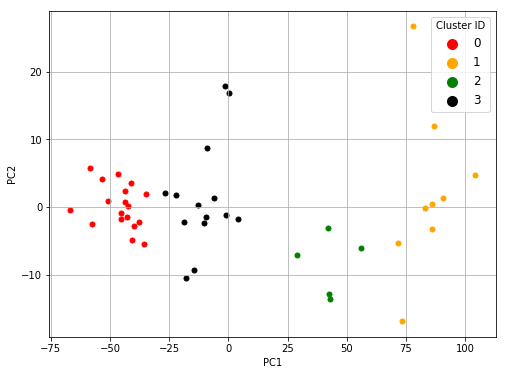

In [272]:
carray = ['red', 'orange', 'green', 'black']
plt.figure(figsize=(8,6))
for i in range(4):
    subData = X_transformed[X_transformed['Cluster ID'] == i]
    plt.scatter(x = subData[0],
                y = subData[1], c = carray[i], label = i, s = 25)
plt.grid(True)
plt.axis(aspect = 'equal')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis(aspect = 'equal')
plt.legend(title = 'Cluster ID', fontsize = 12, markerscale = 2)
plt.show()


In [273]:
# Chicago’s annual crude hospitalization rates from 2000 to 2011?  Please present your answer in a table
print("1(h)")

chicago_annualCHR=crudeDataFrame.sum()/len(crudeDataFrame)
print(chicago_annualCHR)
chicago_annualCHRDataFrame=pd.DataFrame(chicago_annualCHR)

chicago_annualCHRDataFrame

referanceCurve=chicago_annualCHRDataFrame


1(h)
Crude Rate 2000    26.228261
Crude Rate 2001    26.245652
Crude Rate 2002    27.117391
Crude Rate 2003    25.436957
Crude Rate 2004    26.339130
Crude Rate 2005    27.010870
Crude Rate 2006    27.519565
Crude Rate 2007    29.106522
Crude Rate 2008    28.006522
Crude Rate 2009    27.904348
Crude Rate 2010    27.010870
Crude Rate 2011    26.073913
dtype: float64


In [274]:
# Chicago’s annual crude hospitalization rates from 2000 to 2011?  Please present your answer in a table
referanceCurve

,0
Crude Rate 2000,26.228261
Crude Rate 2001,26.245652
Crude Rate 2002,27.117391
Crude Rate 2003,25.436957
Crude Rate 2004,26.339130
Crude Rate 2005,27.010870
Crude Rate 2006,27.519565
Crude Rate 2007,29.106522
Crude Rate 2008,28.006522
Crude Rate 2009,27.904348


In [275]:
graphData['4']=np.array(referanceCurve)

In [276]:
graphData

,Years,0,1,2,3,4
0,2000.0,15.100000,47.133333,32.08,25.007143,26.228261
1,2001.0,14.294444,48.011111,35.32,24.378571,26.245652
2,2002.0,13.972222,50.533333,37.48,25.264286,27.117391
3,2003.0,13.794444,47.088889,36.14,22.664286,25.436957
4,2004.0,12.705556,53.077778,35.24,23.500000,26.339130
5,2005.0,13.983333,51.500000,37.98,24.100000,27.010870
6,2006.0,13.305556,54.844444,40.84,23.471429,27.519565
7,2007.0,14.450000,57.388889,42.62,24.942857,29.106522
8,2008.0,14.105556,53.644444,42.98,24.050000,28.006522
9,2009.0,14.238889,52.400000,43.74,24.071429,27.904348


1(i)


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3358: RuntimeWarning:

Second argument '1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3358: RuntimeWarning:

Second argument '2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3358: RuntimeWarning:

Second argument '3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3358: RuntimeWarning:

Second argument '4' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.



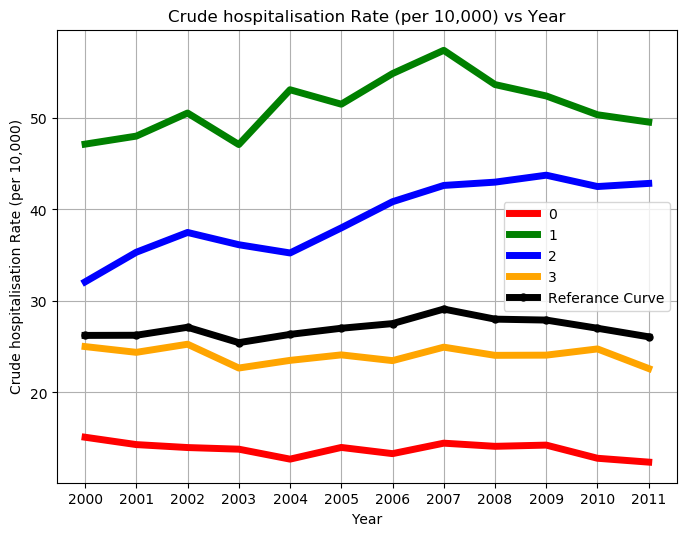

In [277]:
# Plot the crude hospitalization rates in each cluster against the years.  
# You also plot the Chicago’s annual crude hospitalization rates (in your answer in h) against the years as the reference curve
print("1(i)")

plotData=graphData

plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot( 'Years', '0', data=plotData, color='red',linewidth=5)
plt.plot( 'Years', '1', data=plotData, color='green',linewidth=5)
plt.plot( 'Years', '2', data=plotData, marker='', color='blue', linewidth=5)
plt.plot( 'Years', '3', data=plotData, marker='', color='orange', linewidth=5)
plt.plot( 'Years', '4', data=plotData, marker='o', color='black',markersize = 5, linewidth=5, label = 'Referance Curve')
plt.xlabel('Year')
plt.ylabel('Crude hospitalisation Rate (per 10,000)')
plt.title('Crude hospitalisation Rate (per 10,000) vs Year')
plt.xticks(np.arange(2000, 2012, step = 1))
plt.legend()
plt.grid()
plt.show()